In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data = pd.read_csv("netflix_titles.csv")

In [73]:
data.describe()
data.head()
data.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                category
duration                object
listed_in               object
description             object
month_added              int64
year_added               int64
dtype: object

In [43]:
data.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [74]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021
3,s4,TV Show,Jailbirds New Orleans,unknown,Unknown,unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,2021
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,2021


In [44]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [45]:
data['date_added'] = data['date_added'].astype(str).str.strip()
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

In [46]:
data['director'] = data['director'].fillna("unknown")
data['cast'] = data['cast'].fillna("Unknown")
data['country'] = data['country'].fillna("unknown")  
earliest_date = data['date_added'].min()
data['date_added'] = data['date_added'].fillna(earliest_date)
data['rating'] = data['rating'].astype('category')
data['rating'] = data['rating'].fillna(data['rating'].mode())
data['duration'] = data['duration'].fillna("unknown")

In [47]:
data['month_added'] = data['date_added'].dt.month.astype(int)
data['year_added'] = data['date_added'].dt.year.astype(int)

In [48]:
data.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                category
duration                object
listed_in               object
description             object
month_added              int64
year_added               int64
dtype: object

In [49]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        0
listed_in       0
description     0
month_added     0
year_added      0
dtype: int64

In [50]:
data['rating'][data['rating'].isnull()]

5989    NaN
6827    NaN
7312    NaN
7537    NaN
Name: rating, dtype: category
Categories (17, object): ['66 min', '74 min', '84 min', 'G', ..., 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR']

Top 10 countries with most Titles

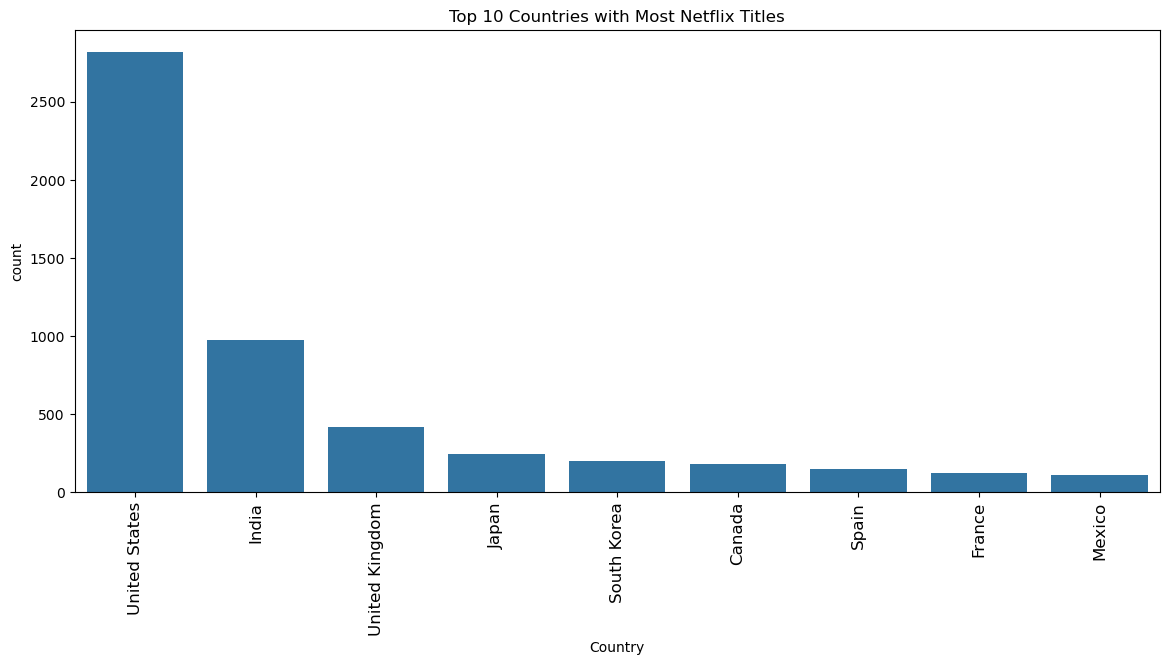

In [72]:
top_countries = data['country'].value_counts().head(10)
top_countries = top_countries[top_countries.index != 'unknown']
plt.figure(figsize = (14,6))
sns.barplot(x = top_countries.index, y = top_countries.values)
plt.title('Top 10 Countries with Most Netflix Titles')
plt.xlabel('Country')
plt.ylabel('count')
plt.xticks(fontsize = 12)
plt.xticks(rotation = 90)
plt.show()

Total number of movies over last 10 years

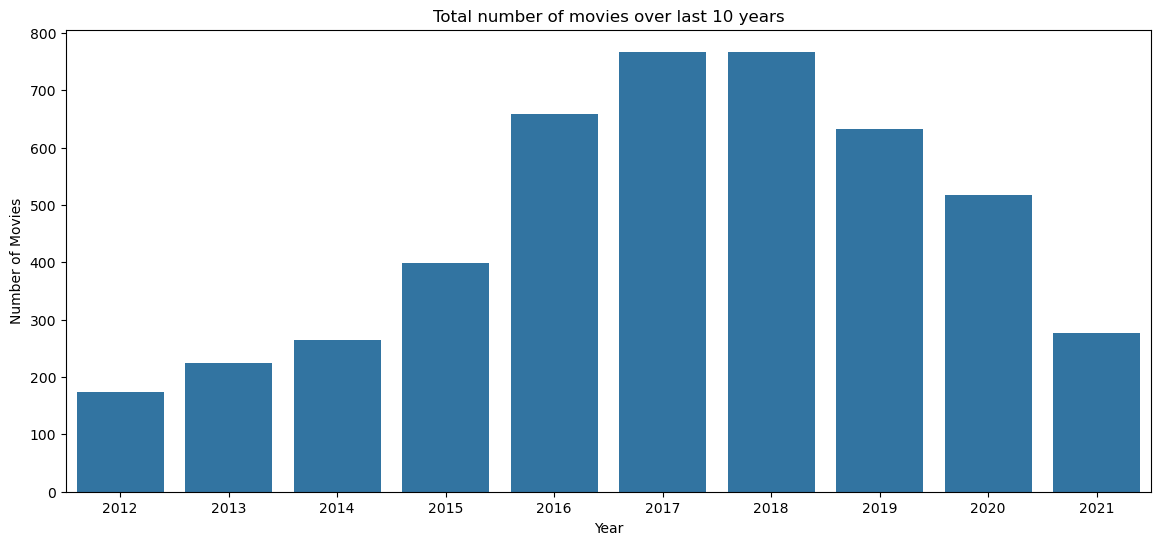

In [93]:
movie = data[data['type'] == 'Movie']
movie_years = movie['release_year'].value_counts().sort_index(ascending = False)
movie_years = movie_years.head(10)

plt.figure(figsize = (14,6))
sns.barplot(x = movie_years.index, y= movie_years.values) 

plt.title('Total number of movies over last 10 years')
plt.xlabel('Year')
plt.ylabel("Number of Movies")

plt.show()
